## Brief intro

In [40]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

In [3]:
# wrangle function
def wrangle(filepath):
    # read csv
    df = pd.read_csv(filepath)
    
    return df

In [4]:
df = wrangle('./toyota.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


## Data Validation
- I have validated my data and have made this observations:
    - model: column matches information provided
    - year: column matches information provided
    - price: column matches information provided
    - transmission: column matches information provided
    - mileage: column matches information provided
    - fuelType: column matches information provided
    - tax: column matches information provided
    - mpg: column matches information provided
    - engineSize: column matches information provided

**NB**: No missing values

# EXPLORE

## Single Variable plot
boxplot
barchart
scatterplot
countplot
lineplot
histogram

In [26]:
fig = px.box(
    data_frame=df,
    x='price',
    title='Distribution of Price'
)

fig.show()

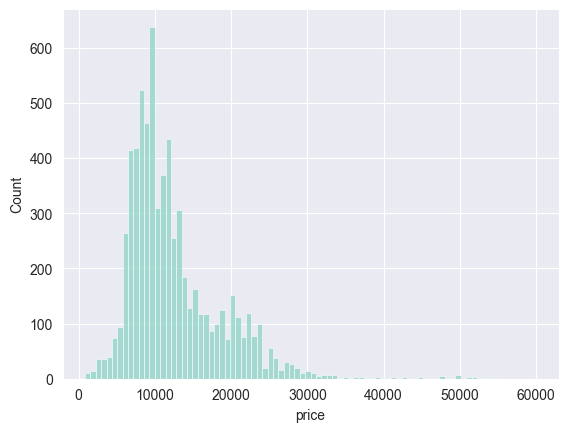

In [30]:
sns.histplot(data=df,
             x='price')
plt.show()

In [32]:
fig = px.scatter(
    data_frame=df,
    x='year',
    y='price',
    title='Price vs Year'
)

fig.update_layout(xaxis_title='Year', yaxis_title='Price [GBP]')
fig.show()

<Axes: >

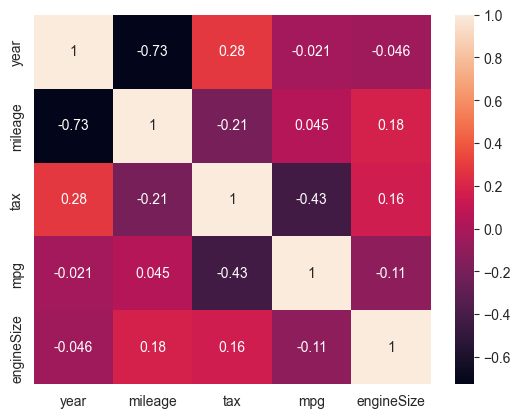

In [38]:
sns.heatmap(df.select_dtypes('number').drop(columns=['price']).corr(), annot=True)

#   SPLIT

In [39]:
# target variable
target = 'price'
y = df[target]
X = df.drop(columns=target)

X.shape, y.shape

((6738, 8), (6738,))

In [41]:
# split into training and test set
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5390, 8) (1348, 8)
(5390,) (1348,)


# BASELINE MODEL

In [42]:
y_train_baseline = y_train.mean()

/tmp/ipykernel_22054/334928950.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

